<a href="https://colab.research.google.com/github/Ilyaas189/CE888-One-/blob/main/Copy_of_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)
print(df)
df.describe()



[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0


,Day,Millons of pounds in sales
count,14.0000,14.000000
mean,7.5000,9.214286
std,4.1833,5.898873
min,1.0000,2.000000
25%,4.2500,5.500000
50%,7.5000,8.500000
75%,10.7500,10.000000
max,14.0000,22.000000


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
 
  new_sample =np.array([])
  for i in range (n_bootstraps):
    c=np.random.choice(x,sample_size, replace=True)
    mean=np.mean(c)
    new_sample=np.hstack((new_sample, mean))

  data_mean=np.mean(new_sample)
  lower=np.amin(new_sample)
  upper=np.amax(new_sample)
  # <---INSERT YOUR CODE HERE--->
  return data_mean, lower, upper


     Bootstrap Iterations       Mean  Value
0                     100   9.278571   mean
1                     100   6.071429  lower
2                     100  14.357143  upper
3                    1100   9.291558   mean
4                    1100   5.000000  lower
..                    ...        ...    ...
145                 48100   3.642857  lower
146                 48100  16.142857  upper
147                 49100   9.207136   mean
148                 49100   3.714286  lower
149                 49100  16.071429  upper

[150 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

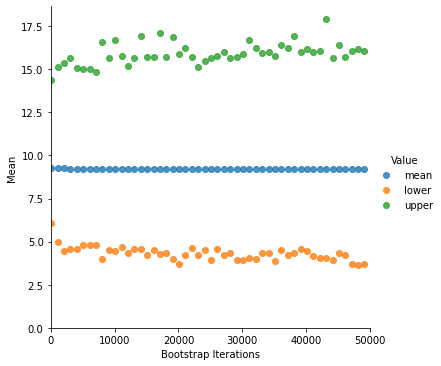

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
print(df_boot)
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [3]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  
  new_sample =np.array([])
  new_samplestd =np.array([])
  for i in range (n_bootstraps):
    c=np.random.choice(sample, sample_size, replace=True)
    mean=np.mean(c)
    std=np.std(c)
    new_sample=np.hstack((new_sample, mean))
    new_samplestd=np.hstack((new_samplestd, std))
  data_mean=np.mean(new_sample)
  lower=np.percentile(new_sample, ((100-ci)/2))
  upper=np.percentile(new_sample, (ci+(100-ci)/2))
  std_mean= np.mean(new_samplestd)
  stl=np.percentile(new_samplestd, ((100-ci)/2))
  stu=np.percentile(new_samplestd, (ci+(100-ci)/2))
  # <---INSERT YOUR CODE HERE--->
  return data_mean, lower, upper, std_mean, stu ,stl
  boot = bootstrap_mean_ci(data, data.shape[0], 10000, 95)
  print(boot)
  s=np.std(data)
  print(s)

In [5]:
boots = []
for i in range(100, 50000, 1000):
  boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
  boots.append([i, boot[0], "mean"])
  boots.append([i, boot[1], "lower"])
  boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


NameError: ignored

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


               0
count  88.000000
mean   44.318182
std     9.895699
min     6.800000
25%    38.200000
50%    43.675000
75%    49.710000
max    69.640000
               0
count  67.000000
mean   45.476418
std     9.803028
min    25.340000
25%    39.270000
50%    44.030000
75%    50.660000
max    83.560000
[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan 

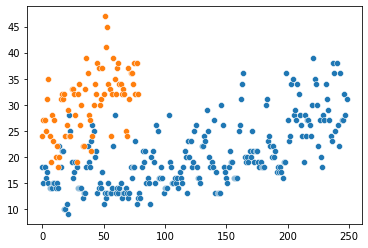

In [ ]:
8# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
#https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv
#https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/voting_data.py
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
PA=np.asarray(dem_share_PA)
OH=np.asarray(dem_share_OH)
df1=pd.DataFrame(dem_share_OH)
df2=pd.DataFrame(dem_share_PA)
print(df1.describe())
print(df2.describe())

currentFleet = df.values.T[0]
newFleet = df.values.T[1]


sns.scatterplot(x=range(249), y=currentFleet)
sns.scatterplot(x=range(249) , y=newFleet)



nan_array = np.isnan(newFleet)
not_nan_array = ~ nan_array
newFleet1 = newFleet[not_nan_array]

print(newFleet)
print(newFleet1)
boot = bootstrap_mean_ci(newFleet1, newFleet1.shape[0], 10000, 73)
print(boot)
boot = bootstrap_mean_ci(OH, OH.shape[0], 20000, 95)
print(boot)
boot = bootstrap_mean_ci(PA, PA.shape[0], 20000, 95)
print(boot)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:

def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  
  new_sample =np.array([])
  for i in range (n_bootstraps):
    c=np.random.choice(sample, sample_size, replace=True)
    mean=np.mean(c)
    new_sample=np.hstack((new_sample, mean))

  data_mean=np.mean(new_sample)
  lower=np.percentile(new_sample, (100-ci))
  upper=np.percentile(new_sample, ci)# <---INSERT YOUR CODE HERE--->
  return data_mean, lower, upper# <---INSERT YOUR CODE HERE--->

boot = bootstrap_mean_ci(currentFleet, currentFleet.shape[0], 1000, 95)
print (boot)
  
boot = bootstrap_mean_ci(newFleet1, newFleet1.shape[0], 1000, 95)
print (boot)

(20.167008032128514, 19.497791164658633, 20.83172690763052)
(30.45845569620253, 29.354430379746834, 31.506962025316454)


In [1]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
  """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
  """

  tobs=np.abs(np.mean(sample1) - np.mean(sample2))
  print (tobs)
  contArray= np.concatenate((sample1,sample2))
  obs=0
  for i in range (n_permutations):
    perm=np.random.permutation(contArray)
    
    pold=perm[:int(len(sample1))]
    pnew=perm[int(len(sample1)):]
    
    tPerm= np.abs(np.mean(pold)-np.mean(pnew))
    #print(tPerm)
    if tPerm>=tobs:
      obs+=1
    pvalue = obs/n_permutations


  return pvalue
print(permut_test(currentFleet, newFleet1, 30000))
print(permut_test(OH, PA, 30000))

NameError: ignored